#### 각 시장별 워드 클라우드를 시각화해 , 시장별 트렌드를 파악

In [1]:
from wordcloud import WordCloud

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [15]:
import FinanceDataReader as fdr

In [8]:
from tqdm import tqdm

In [9]:
tqdm.pandas()

In [13]:
from collections import Counter

In [5]:
df = pd.read_csv('pos_score.csv', low_memory=False)

In [16]:
krx_df = fdr.StockListing('KRX')

In [10]:
df['내용2'] = df[['내용_명사_str','형용사_어간','부사_어간','동사_어간']].fillna('').progress_apply(lambda x : ' '.join(x), axis=1)

100%|██████████| 81072/81072 [00:00<00:00, 293019.99it/s]


In [11]:
df.head(2)

,닉네임,날짜,내용,종목,내용_명사,내용_형용사,내용_부사,내용_동사,내용_명사_str,내용_형용사_str,내용_부사_str,내용_동사_str,형용사_어간,부사_어간,동사_어간,긍정점수,내용2
0,GROK,2025-01-11T22:59:18+09:00,- 디자인 변화: S25 울트라는 기존의 각진 디자인에서 둥근 모서리로 변경되었으며...,5930,"['디자인', '변화', '울트라', '기존', '진', '디자인', '모서리', ...","['둥근', '있습니다', '동일한', '있음']",[],"['되었으며', '와', '보입니다']","디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...","둥근, 있습니다, 동일한, 있음",NaN,"되었으며, 와, 보입니다","둥글다,있다,동일하다,있다",NaN,"되어다,오다,보이다",1,"디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자..."
1,공감아,2025-01-11T22:47:22+09:00,7만원 8만원에 물려있는게 대부분이라 7만원까지 혹여 올라도 물려있던분들은 원금 회...,5930,"['대부분', '혹', '던', '원금', '회복', '시', '다시', '풀', ...",[],[],"['물려있는게', '올라도', '물려있']","대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시",NaN,NaN,"물려있는게, 올라도, 물려있",NaN,NaN,"물리다,오르다,물리다",-1,"대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시 물리다,오르다,물리다"


In [12]:
df.head(1)['내용2']

0    디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...
Name: 내용2, dtype: object

In [17]:
# community_contents와 krx_df를 '종목'과 'Code'를 기준으로 병합합니다.
df = df.merge(
    krx_df[['Code', 'Market']],
    left_on='종목',
    right_on='Code',
    how='left'
)

# '시장' 열 이름을 변경합니다.
df.rename(columns={'Market': '시장'}, inplace=True)


In [18]:
# KOSPI에 해당하는 '내용2' 데이터만 필터링
kospi_text = ' '.join(df[df['시장'] == 'KOSPI']['내용2'])  # KOSPI에 대한 모든 내용을 하나의 문자열로 결합
words = kospi_text.split(', ')  # 쉼표로 단어 분리
word_counts = Counter(words)  # 단어 빈도수 계산

In [ ]:
def display_word_cloud(dict, max_words=50, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    # stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
    #              '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      # stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate_from_frequencies(dict)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

In [19]:
# 워드클라우드 생성 함수 정의
def display_word_cloud(word_counts, max_words=50, width=1200, height=600):
    font_path = r'C:\Windows\Fonts\malgun.ttf'  # 한글 폰트 경로
    word_cloud = WordCloud(
        font_path=font_path, 
        width=width, 
        height=height,
        background_color='white',
        max_words=max_words,
        min_word_length=2,
        random_state=2024
    ).generate_from_frequencies(word_counts)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(word_cloud)
    plt.axis('off')  # 축 숨기기
    plt.show()
    return word_cloud

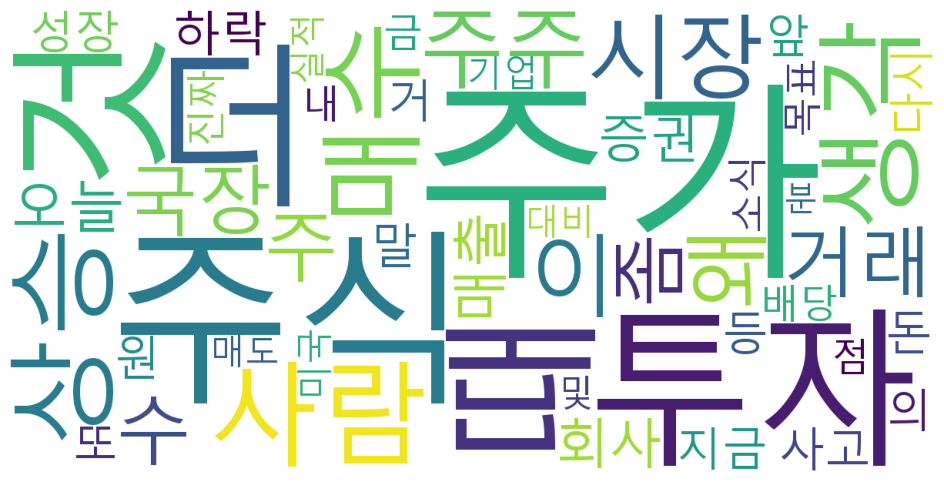

In [20]:
display_word_cloud(word_counts)